In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
from sklearn.linear_model import LogisticRegression

In [30]:
#Load the data set

bank = pd.read_csv("C:\\Users\\Admin\\Downloads\\bank-full.csv",delimiter=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [31]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [32]:
bank.shape

(45211, 17)

In [33]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [34]:
# Dividing our data into input and output variables 
X = bank.iloc[:,0:16] #all independent features
Y = bank.iloc[:,16] #target variable

In [35]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [36]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [37]:
Y=Y.map(dict(yes=1,no=0))

In [38]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [39]:
X=pd.get_dummies(X)
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
bank_new=X.join(Y)
bank_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [41]:
#classifier = Model(hyperparameters)
#classifier.fit(X, y)
#y_pred = classifier.predict(new_X)

In [42]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
# classifier.write_to_pickle('path of file.pkl')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
classifier.coef_

array([[-2.16762730e-02,  2.38698124e-05, -1.09463989e-02,
         3.83736589e-03, -3.89885844e-01,  2.66544534e-03,
        -1.06107499e-01, -2.53530408e-02, -2.45878726e-01,
        -2.65446523e-02, -9.12450615e-03,  6.42672514e-03,
         1.61883021e-01, -1.59554647e-02, -8.64351710e-02,
         2.91372803e-02, -6.84417845e-02,  2.43102654e-03,
         2.17612766e-03,  1.61347186e-02, -1.69300974e-01,
        -1.22512909e-01, -6.82784649e-02, -2.65362773e-01,
         4.49506713e-02,  1.30114021e-02, -2.55970812e-01,
        -1.97083529e-02,  3.53528328e-01, -6.29207492e-01,
        -8.13467766e-02, -1.94332388e-01,  8.98050391e-02,
         4.89207616e-02, -4.14404965e-01,  4.26516549e-02,
         1.93199432e-02,  2.81554803e-02, -1.45821527e-02,
        -1.41155718e-02, -8.32681058e-02, -5.50883199e-02,
         8.53085521e-02, -3.98350051e-01, -5.55099366e-02,
         9.67680726e-02,  7.30312702e-02, -1.32258898e-01,
        -3.13322894e-02,  3.06054182e-01, -4.18142160e-0

In [44]:
classifier.intercept_

array([-0.27570496])

In [45]:
#Predict for X dataset
# classifer.read_pickle_file('path of file.pkl')
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
classifier.predict_proba(X)

array([[0.96241542, 0.03758458],
       [0.97703047, 0.02296953],
       [0.9805112 , 0.0194888 ],
       ...,
       [0.32188742, 0.67811258],
       [0.91554389, 0.08445611],
       [0.84494542, 0.15505458]])

In [47]:
classifier.predict_proba(X)[:,1]

array([0.03758458, 0.02296953, 0.0194888 , ..., 0.67811258, 0.08445611,
       0.15505458])

In [48]:
y_pred_df = pd.DataFrame({'actual': Y,
                         'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})
y_pred_df

,actual,prob,predicted
0,0,0.037585,0
1,0,0.022970,0
2,0,0.019489,0
3,0,0.018847,0
4,0,0.119151,0
...,...,...,...
45206,1,0.615091,1
45207,1,0.222694,0
45208,1,0.678113,1
45209,0,0.084456,0


In [49]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
y_pred_df

,actual,prob,predicted,correct
0,0,0.037585,0,True
1,0,0.022970,0,True
2,0,0.019489,0,True
3,0,0.018847,0,True
4,0,0.119151,0,True
...,...,...,...,...
45206,1,0.615091,1,True
45207,1,0.222694,0,False
45208,1,0.678113,1,True
45209,0,0.084456,0,True


In [50]:
y_pred_df[y_pred_df['correct']==True]

,actual,prob,predicted,correct
0,0,0.037585,0,True
1,0,0.022970,0,True
2,0,0.019489,0,True
3,0,0.018847,0,True
4,0,0.119151,0,True
...,...,...,...,...
45200,1,0.784824,1,True
45206,1,0.615091,1,True
45208,1,0.678113,1,True
45209,0,0.084456,0,True


In [51]:
y_pred_df[y_pred_df['correct']==False]

,actual,prob,predicted,correct
37,0,0.942857,1,False
43,0,0.798069,1,False
59,0,0.929927,1,False
83,1,0.353231,0,False
129,1,0.086846,0,False
...,...,...,...,...
45202,1,0.182524,0,False
45203,1,0.321797,0,False
45204,1,0.090168,0,False
45205,1,0.226217,0,False


# Confusion Matrix

In [52]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y,y_pred)

print (confusion_matrix)

[[39131   791]
 [ 4106  1183]]


In [53]:
classifier.score(X,Y)

0.891685651721926

<AxesSubplot:>

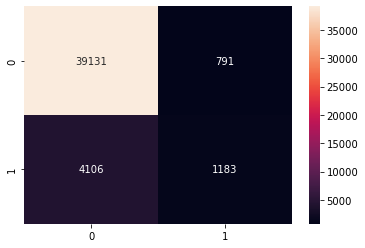

In [54]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot = True, fmt = 'd')

In [55]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [56]:
# ROC curve 

Text(0.5, 1.0, 'logit model (area = 0.60)')

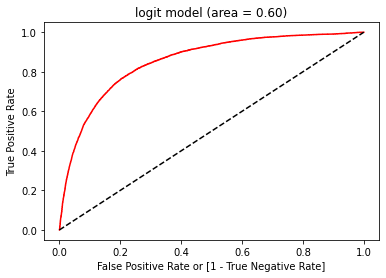

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red') #label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

In [58]:
auc

0.6019290675050418

# After Seeing the confusion matrix TP=39089 and TN=1242, Which clearly indicates that our model will be biased towards TP more.

# In order to create a more balanced model letscerate a model that takes equal no. of rows with y as yes and same no.of y as noes.

In [59]:
banky=bank_new[bank_new['y']==1]
bankn=bank_new[bank_new['y']==0]

In [60]:
banky

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
83,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
86,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
87,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
129,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
168,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,40,8,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [61]:
bankn=bankn.sample(n=5290)
bankn

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
17715,57,128,29,143,8,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
27421,49,66,21,59,4,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
15666,43,0,21,111,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13236,25,142,8,312,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9406,46,613,6,51,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40515,81,0,7,170,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11219,57,1172,18,26,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7173,45,0,29,155,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
20083,32,312,11,67,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
bank=pd.concat([banky,bankn])
bank=bank.sample(frac=1)
bank

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
28477,56,6507,29,134,1,196,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43519,58,496,22,132,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1284,31,1798,8,393,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
19207,42,0,6,81,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39997,54,200,3,170,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41512,50,3764,9,214,2,99,4,0,1,0,...,0,0,0,0,1,1,0,0,0,1
273,56,155,5,118,3,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
27312,39,529,21,673,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
21187,58,-397,14,386,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# Dividing our data into input and output variables 
X=bank.iloc[:,0:51]
Y=bank.iloc[:,51]

In [64]:
#classifier = Model(hyperparameters)
#classifier.fit(X, y)
#y_pred = classifier.predict(new_X)

In [65]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
# classifier.write_to_pickle('path of file.pkl')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
# classifier.write_to_pickle('path of file.pkl')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
classifier.intercept_

array([-0.18533544])

In [68]:
#Predict for X dataset
# classifer.read_pickle_file('path of file.pkl')
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [69]:
classifier.predict_proba(X)

array([[0.73357856, 0.26642144],
       [0.68324083, 0.31675917],
       [0.69771133, 0.30228867],
       ...,
       [0.27514034, 0.72485966],
       [0.30154281, 0.69845719],
       [0.96962344, 0.03037656]])

In [70]:
classifier.predict_proba(X)[:,1]

array([0.26642144, 0.31675917, 0.30228867, ..., 0.72485966, 0.69845719,
       0.03037656])

In [71]:
y_pred_df = pd.DataFrame({'actual': Y,
                         'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})
y_pred_df

,actual,prob,predicted
28477,0,0.266421,0
43519,1,0.316759,0
1284,0,0.302289,0
19207,0,0.364511,0
39997,1,0.475657,0
...,...,...,...
41512,1,0.634281,1
273,0,0.118487,0
27312,0,0.724860,1
21187,0,0.698457,1


# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y,y_pred)

print (confusion_matrix)

In [73]:
classifier.score(X,Y)

0.8085830418754135

In [74]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5290
           1       0.81      0.81      0.81      5289

    accuracy                           0.81     10579
   macro avg       0.81      0.81      0.81     10579
weighted avg       0.81      0.81      0.81     10579



Text(0.5, 1.0, 'logit model (area = 0.81)')

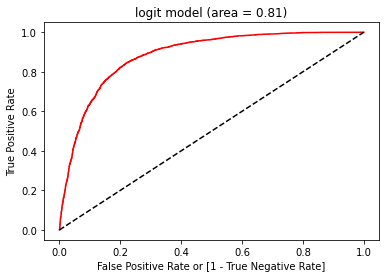

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red') #label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

In [76]:
auc

0.8085827810403658

# The actual biased data gives more differences between TP and TN rate and low auc, but after creating new model which is not only fitted best but also gives more auc values.